<a href="https://colab.research.google.com/github/Mar-vm/VitalIA/blob/mariana/prediccion_7class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# 📂 Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# 📦 Librerías necesarias
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import os


In [ ]:

# ⚙️ Rutas de archivos en Drive
modelo_path = "/content/drive/MyDrive/modelo_efficientnet_skin_cancer.pth"  # Cambiar si se usa MobileNet
clases_path = "/content/drive/MyDrive/skin_cancer_clases.json"


In [ ]:

# 📚 Cargar las clases
with open(clases_path, "r") as f:
    class_names = json.load(f)

print("Clases cargadas:", class_names)


Clases cargadas: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:

# 🔄 Transformación para imagen de entrada
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])


In [ ]:

# 🧠 Cargar modelo (EfficientNet por defecto)
model = models.efficientnet_b0(pretrained=False)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_names))
model.load_state_dict(torch.load(modelo_path, map_location=torch.device('cpu')))
model.eval()
print("✅ Modelo cargado y listo.")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Modelo cargado y listo.


In [ ]:

# 📤 Subir una imagen para probar
from google.colab import files
uploaded = files.upload()

# Obtener la primera imagen subida
img_path = list(uploaded.keys())[0]


Saving nevus.jpg to nevus.jpg


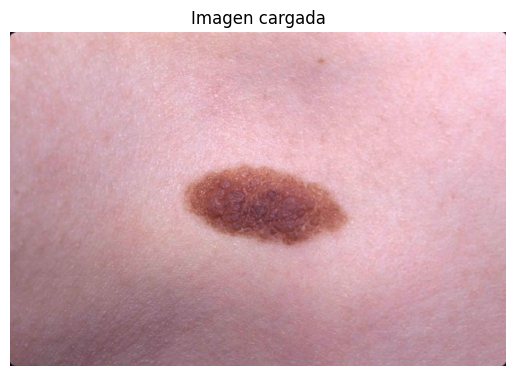

✅ La imagen fue clasificada como: **nv**


In [ ]:

# 🔍 Realizar predicción
image = Image.open(img_path).convert("RGB")
plt.imshow(image)
plt.axis("off")
plt.title("Imagen cargada")
plt.show()

input_tensor = transform(image).unsqueeze(0)  # Agregar dimensión batch
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = torch.max(outputs, 1)

predicted_class = class_names[predicted.item()]
print(f"✅ La imagen fue clasificada como: **{predicted_class}**")


In [ ]:
malignas = ['mel', 'bcc', 'akiec']
es_maligno = predicted_class in malignas

print(f"🧪 Resultado clínico: {'MALIGNO ⚠️' if es_maligno else 'BENIGNO ✅'}")


🧪 Resultado clínico: BENIGNO ✅
